In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Assignment/ML/amazon_co-ecommerce_sample.csv")
df.head()

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


### Understanding the data

In [3]:
df.columns

Index(['index', 'uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

In [4]:
# size of the dataset

df.shape

(10000, 18)

### Data Cleaning 

In [5]:
# Dropping unwanted columns

df.drop(['customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'], axis=1, inplace=True)

In [6]:
df.dtypes

index                                 int64
uniq_id                              object
product_name                         object
manufacturer                         object
price                                object
number_available_in_stock            object
number_of_reviews                    object
number_of_answered_questions        float64
average_review_rating                object
amazon_category_and_sub_category     object
dtype: object

In [7]:
df.isnull().sum()

index                                  0
uniq_id                                0
product_name                           0
manufacturer                           7
price                               1435
number_available_in_stock           2500
number_of_reviews                     18
number_of_answered_questions         765
average_review_rating                 18
amazon_category_and_sub_category     690
dtype: int64

##### Dealing with missing values

In [8]:
df['number_available_in_stock'] = df['number_available_in_stock'].fillna(0)
df['number_of_answered_questions'] = df['number_of_answered_questions'].fillna(0)
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['average_review_rating'] = df['average_review_rating'].fillna(0)

In [9]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

##### Dealing with noise

In [10]:
# Convert data types of columns price, number_available_in_stock, number_of_reviews, average_review_rating from object to numeric

df['price'] = df['price'].apply(lambda x : x.replace('£', '') if '£' in str(x) else x)
df['number_available_in_stock'] = df['number_available_in_stock'].apply(lambda x : int(str(x)[0]))
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x : int(str(x).replace(',', '')) if ',' in str(x) else int(x))
df['average_review_rating'] = df['average_review_rating'].apply(lambda x : float(str(x).split(' ')[0]))

In [11]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')

In [12]:
# convert amazon_category_and_sub_category in different columns [Category and SubCategory].

df['Category'] = df['amazon_category_and_sub_category'].apply(lambda x : str(x).split('>')[0])
df['Sub_Category'] = df['amazon_category_and_sub_category'].apply(lambda x : str(x).split('>')[1])

In [13]:
df.drop(['amazon_category_and_sub_category', 'index'], axis=1, inplace=True)

In [14]:
df.dropna(inplace=True)

### EDA

In [15]:
# statistical summery for all columns.

df.describe()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,19.843493,2.601526,9.362567,1.705117,4.703303
std,39.031481,2.469125,36.469600,2.539625,0.407793
min,0.010000,0.000000,0.000000,0.000000,0.000000
25%,4.650000,0.000000,1.000000,1.000000,4.500000
50%,10.000000,2.000000,2.000000,1.000000,5.000000
75%,19.990000,4.000000,6.000000,2.000000,5.000000
max,995.110000,9.000000,1399.000000,39.000000,5.000000


In [16]:
# Do some Outlier studies and remove the outliers appropriately.

col = ['price', 'number_of_reviews', 'number_of_answered_questions']

In [18]:
# no of unique products are there in the dataset 

df['product_name'].nunique()

7967

### Top 5 Manufacture

Text(0, 0.5, 'Count of products')

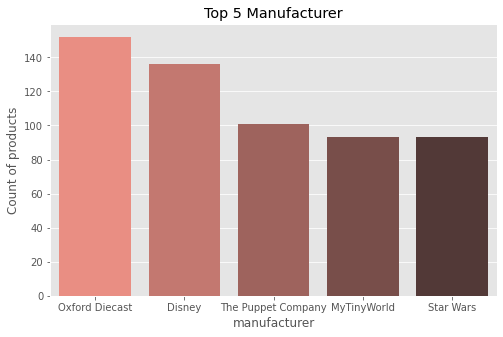

In [59]:
# no of unique products from each manufacturer

x1 = df.groupby('manufacturer')['product_name'].nunique().to_frame().sort_values('product_name', ascending=False).reset_index()
plt.figure(figsize=(8,5))
pal = sns.color_palette("dark:salmon_r")
sns.barplot(data=x1.head(5), x='manufacturer', y='product_name', palette=pal)
plt.title('Top 5 Manufacturer')
plt.ylabel('Count of products')

In [32]:
# average price of products in each category

x = df.groupby('Category')['price'].mean().to_frame().sort_values('price', ascending=False)
x.iloc[:1]

,price
Category,
Hobbies,34.150284


In [33]:
# average price of products in each category and subcategory and its highest average price

y = df.groupby(['Category', 'Sub_Category'])['price'].mean().to_frame().sort_values('price', ascending=False)
y.iloc[:1]

,,price
Category,Sub_Category,
Baby & Toddler Toys,Rocking Horses,133.625


In [34]:
# Products with high rating and in stock

df[(df['average_review_rating']>=4.5) & (df['number_available_in_stock']!=0)][['product_name', 'price']]

,product_name,price
0,Hornby 2014 Catalogue,3.42
8,Hornby Gauge Western Express Digital Train Set...,235.58
9,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,27.49
11,Bachmann 37-662 14 Ton Tank Wagon Pease & Part...,9.60
12,Hornby 00 Gauge 253mm Weathered Paviland Grang...,119.50
...,...,...
8002,Star Wars The Clone Wars CW01 Captain Rex 3.75...,32.99
8005,Batman 1966 TV Series Action Figures - The Rid...,22.95
8007,Defiance Lawkeeper Metal Badge Prop Replica,43.99
8008,Justice League of America Series 3 Green Lante...,49.81


### Top Category by No of Reviews

Text(0.5, 1.0, 'Top Category by No of Reviews')

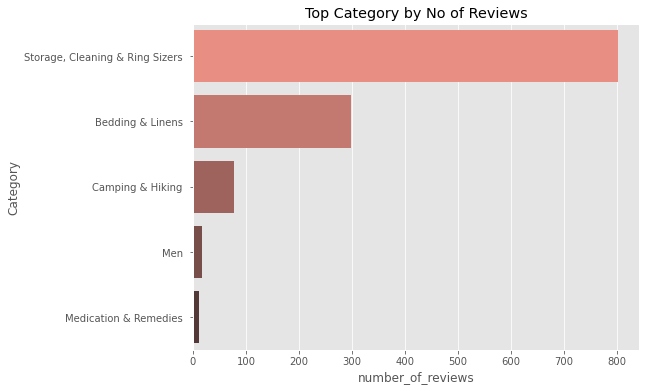

In [62]:
# category-wise the highest median number of reviews

z = df.groupby('Category')['number_of_reviews'].median().to_frame().sort_values('number_of_reviews', ascending=False)
z.reset_index(inplace=True)
plt.figure(figsize=(8,6))
pal = sns.color_palette("dark:salmon_r")
sns.barplot(data = z.head(5), x='number_of_reviews', y ='Category', palette=pal)
plt.title('Top Category by No of Reviews')

In [36]:
# average price of products with the highest number of answered questions in each category and subcategory

df[(df['number_of_answered_questions']==df['number_of_answered_questions'].max())].groupby(['Category', 'Sub_Category'])\
                                        ['price'].mean().to_frame()

,,price
Category,Sub_Category,
Arts & Crafts,Children's Craft Kits,4.399091
Bedding & Linens,Children's Bedding,7.490000


In [42]:
# correlation between the number of reviews and the review rating for products in each category and subcategory

x2 = df.groupby(['Category', 'Sub_Category'])[['number_of_reviews', 'average_review_rating']].corr()
x2

number_of_reviews  \
Category       Sub_Category                                                      
Arts & Crafts   Art & Craft Supplies  number_of_reviews               1.000000   
                                      average_review_rating                NaN   
                Art Sand              number_of_reviews               1.000000   
                                      average_review_rating          -0.137916   
                Blackboards           number_of_reviews               1.000000   
...                                                                        ...   
Women           Accessories           average_review_rating                NaN   
                Accessories           number_of_reviews                    NaN   
                                      average_review_rating                NaN   
Worlds Apart    Kid Venture           number_of_reviews               1.000000   
                                      average_review_rating          -0.944911   

                                                             average_review_rating  
Category       Sub_Category                                                         
Arts & Crafts   Art & Craft Supplies  number_of_reviews                        NaN  
                                      average_review_rating                    NaN  
                Art Sand              number_of_reviews                  -0.137916  
                                      average_review_rating               1.000000  
                Blackboards           number_of_reviews                  -0.224012  
...                                                                            ...  
Women           Accessories           average_review_rating                    NaN  
                Accessories           number_of_reviews                        NaN  
                                      average_review_rating                    NaN  
Worlds Apart    Kid Venture           number_of_reviews                  -0.944911  
                                      average_review_rating               1.000000  

[310 rows x 2 columns]

In [28]:
# correlation between the number of reviews and the review rating for products in each category and subcategory

df.groupby(['Category', 'Sub_Category'])[['number_of_reviews', 'price']].corr()

number_of_reviews  \
Category       Sub_Category                                                  
Arts & Crafts   Art & Craft Supplies  number_of_reviews           1.000000   
                                      price                       1.000000   
                Art Sand              number_of_reviews           1.000000   
                                      price                       0.174675   
                Blackboards           number_of_reviews           1.000000   
...                                                                    ...   
Women           Accessories           price                            NaN   
                Accessories           number_of_reviews                NaN   
                                      price                            NaN   
Worlds Apart    Kid Venture           number_of_reviews           1.000000   
                                      price                       0.981799   

                                                            price  
Category       Sub_Category                                        
Arts & Crafts   Art & Craft Supplies  number_of_reviews  1.000000  
                                      price              1.000000  
                Art Sand              number_of_reviews  0.174675  
                                      price              1.000000  
                Blackboards           number_of_reviews -0.272003  
...                                                           ...  
Women           Accessories           price                   NaN  
                Accessories           number_of_reviews       NaN  
                                      price                   NaN  
Worlds Apart    Kid Venture           number_of_reviews  0.981799  
                                      price              1.000000  

[310 rows x 2 columns]

In [29]:
df[(df['average_review_rating']==df['average_review_rating'].max()) | (df['average_review_rating']==df['average_review_rating'].min())].groupby(['Category', 'Sub_Category'])\
                                    ['price'].mean().to_frame()


price
Category               Sub_Category                     
Arts & Crafts           Art & Craft Supplies    7.290000
                        Art Sand                9.458421
                        Blackboards            26.576000
                        Children's Chalk        4.990000
                        Children's Craft Kits  12.405263
...                                                  ...
Sports Toys & Outdoor   Darts & Accessories    23.825714
                        Garden Tools           25.720000
                        Kites & Flight Toys    26.842632
                        Target Games           26.990000
Worlds Apart            Kid Venture            11.970000

[113 rows x 1 columns]

In [30]:
# products have a review rating that is significantly lower than the average review rating for their category and subcategory, and what are their names and prices

df[(df['average_review_rating']<df['average_review_rating'].mean())].groupby(['Category', 'Sub_Category'])\
                                    ['price'].count().to_frame()


price
Category                 Sub_Category                  
Arts & Crafts             Art Sand                   31
                          Blackboards                 6
                          Children's Chalk            2
                          Children's Craft Kits      30
                          Children's Craft Kits     142
...                                                 ...
Supporters' Gear          Football                    1
Sweets, Chocolate & Gum   Chocolate                   1
Women                     Accessories                 1
                          Accessories                 1
Worlds Apart              Kid Venture                 1

[132 rows x 1 columns]

In [31]:
#average review rating for products with different availability statuses

a=df[df['number_available_in_stock']>0]['average_review_rating'].mean()

In [32]:
b=df[df['number_available_in_stock']==0]['average_review_rating'].mean()

In [33]:
# there is no significant in average review rating between products that are in stock and out of stock.

Diff = abs(a-b)
Diff

0.0648133350245379

### No of Products by Category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hobbies '),
  Text(1, 0, 'Die-Cast & Toy Vehicles '),
  Text(2, 0, 'Figures & Playsets '),
  Text(3, 0, 'Games '),
  Text(4, 0, 'Characters & Brands '),
  Text(5, 0, 'Arts & Crafts '),
  Text(6, 0, 'Party Supplies '),
  Text(7, 0, 'Fancy Dress '),
  Text(8, 0, 'Dolls & Accessories '),
  Text(9, 0, 'Sports Toys & Outdoor ')])

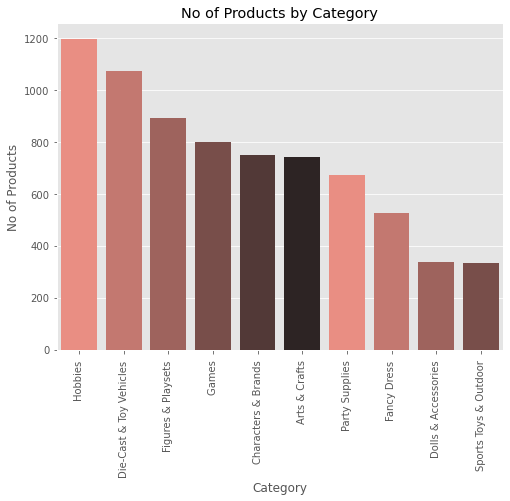

In [49]:
df2 = df.groupby('Category')['product_name'].count().to_frame().sort_values('product_name', ascending=False).reset_index().head(10)

pal = sns.color_palette("dark:salmon_r")
plt.figure(figsize=(8,6))
sns.barplot(data=df2, x='Category', y='product_name', palette=pal )
plt.title('No of Products by Category')
plt.xlabel('Category')
plt.ylabel('No of Products')
plt.xticks(rotation=90)

### Top 10 Movies by Reviews

Text(0.5, 1.0, 'Top 10 Movies by Reviews')

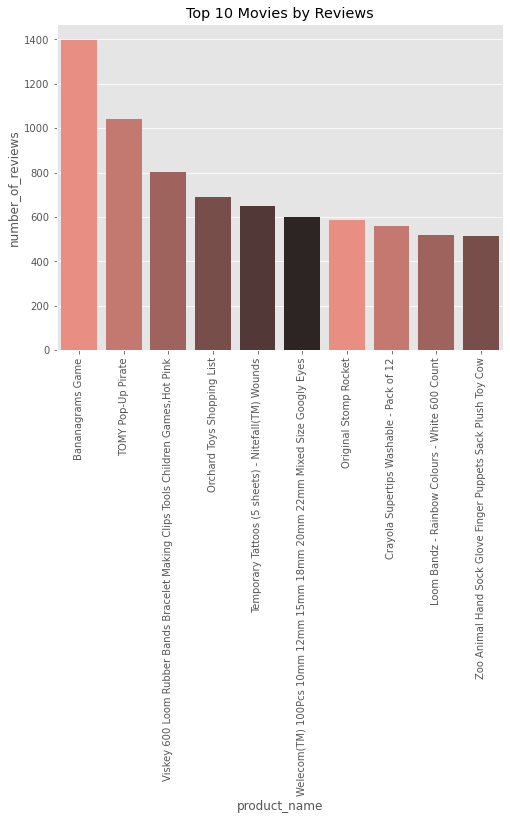

In [61]:
df3 = df[(df['average_review_rating']==df['average_review_rating']) & (df['number_of_reviews']>df['number_of_reviews'].mean())].sort_values('number_of_reviews', ascending=False).head(10)

pal = sns.color_palette("dark:salmon_r")
plt.figure(figsize=(8, 6))
sns.barplot(data = df3, x='product_name', y='number_of_reviews', palette=pal)
plt.xticks(rotation=90)
plt.title('Top 10 Movies by Reviews')

### Rating VS Number of Reviews

Text(0.5, 1.0, 'Rating VS Number of Reviews')

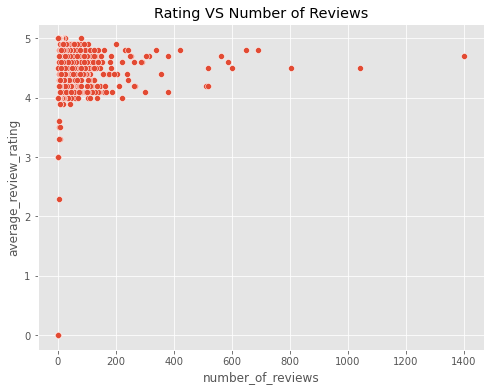

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='average_review_rating')
plt.title('Rating VS Number of Reviews')